#รหัส : 6304101355

#ชื่อ-สกุล : นางสาว ชนากานต์ ตันตาวิน

#กลุ่ม : 1

### จุดประสงค์
- เพื่อศึกษา Optimal Page algorithm ซึ่งเป็นอัลกอริทึมสำหรับการทำ Page replacement
- เพื่อนำไปประยุกต์ใช้สำหรับภาษาไทย
### งานการประยุกต์ใช้
- สร้าง reference word สำหรับภาษาไทย โดยกำหนดให้มีคำอ้างอิงจะต้องมีคำที่ไม่ซ้ำกันจำนวนอย่างน้อย 20 คำ (5 คะแนน)
ทำให้เกิด page fault จำนวน 5 ครั้ง โดยคำที่จะใช้สำหรับทำการแทนที่ (replacement)จะต้องเป็นคำที่มีชนิดเดียวกัน (10 คะแนน) เช่น
 - ประธาน จะหาคำที่ทำหน้าที่ตรงกับ ประธาน
 - กริยา จะหาคำที่ทำหน้าที่ตรงกับ กริยา
 - กรรม จะหาคำที่ทำหน้าที่ตรงกับ กรรม
- ให้แสดง Fault rate (15 คะแนน)
- ให้แสดงกราฟความสัมพันธ์ของแต่ละโหนด (20 คะแนน)

### อัลกอริทึมเพจที่เหมาะสมที่สุด (Optimal Page algorithm)
- อัลกอริทึมการเปลี่ยนเพจที่เหมาะสมที่สุด มีอัตราความผิดพลาดของเพจต่ำที่สุด 
- เพจที่ไม่ถูกใช้เป็นระยะเวลานานที่สุดในอนาคต คือเพจที่จะถูกเลือกเพื่อแทนที่


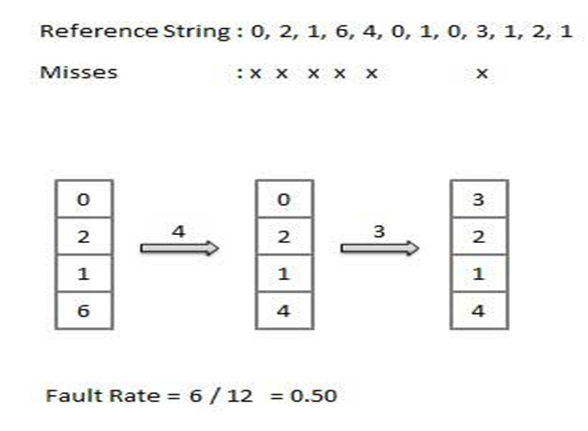

### จากลำดับข้อมูล [0, 2, 1, 6], [4], 0, 1, 0, [3], 1, 2, 1
1. Pf (4) [-]/0, [-]/2, [-]/1, [-]/6 -> [0, 2, 1, 6*] 
2. Pf (5) [6]/4 -> [0, 2, 1, 4*]
3. Pf (5) [0]/0 -> [0, 2, 1, 4*]
4. Pf (5) [1]/1 -> [0, 2, 1, 4*]
5. Pf (5) [0]/0 -> [0, 2, 1, 4*]
6. Pf (6) [4]/3 -> [0, 2, 1, 4*]
7. Pf (6) [1]/1 -> [0, 2, 1, 3*]
8. Pf (6) [2]/2 -> [0, 2, 1, 3*]
9. Pf (6) [1]/1 -> [0, 2, 1, 3*]


In [ ]:
#Optimal page replacement algorithm (OPT or OPR) implementation in python
#Created By: Suman Adhikari

#print("Enter the number of frames: ",end="")
#capacity = int(input())
capacity = 4
f,fault,pf = [],0,'No'
#print("Enter the reference string: ",end="")

#inputs = input().strip().split()
#inputs = ['0' , '2' , '1'  , '6'  , '4'  , '6' , '1'  , '2' , '0'  , '1'  , '2', '1']
#inputs = ['ริว', 'รัก', 'หมา', 'น้อย', 'มาก', 'เขา', 'หมา', 'ริว', 'ไอ่', 'หมา', 'รัก', 'หมา']
inputs = ['มุก', 'เล่น', 'เกมส์', 'ทุกวัน',
              'หมวย', 'กิน', 'ที่', 'หมวย',
              'กิน', 'เรียน', 'หมวย', 'กิน', 
              'ที่', 'ฟ้า', 'อ่าน', 'หนังสือ',
              'ฟ้า', 'อ่าน', 'ไปเรื่อย', 'ฟ้า',
              'อ่าน', 'อ่าน', 'มูลู่', 'กิน',
              'ข้าวเหนียว', 'มุก', 'กิน', 'ที่ห้อง',
              'มุก', 'กิน', 'ข้าวเหนียว', 'ล่าล่า',
              'ง่วงนอน', 'มากๆ', 'เลย', 'ล่าล่า',
              'ง่วงนอน','มากๆ']

print(f"inputs:{inputs}")
#s = list(map(int,inputs))
s = list(map(str,inputs))
#s = list(map(int,input().strip().split()))
print("\nString|Frame →\t",end='')
for i in range(capacity):
    print(i,end=' ')
print("Fault\n   ↓\n")
occurance = [None for i in range(capacity)]
for i in range(len(s)):
    if s[i] not in f:
        if len(f)<capacity:
            f.append(s[i])
        else:
            for x in range(len(f)):
                if f[x] not in s[i+1:]:
                    f[x] = s[i]
                    break
                else:
                    occurance[x] = s[i+1:].index(f[x])
            else:
                f[occurance.index(max(occurance))] = s[i]
        fault += 1
        pf = 'Miss'
    else: 
        pf = 'Hit'
    print("   %s\t\t"%s[i],end='')
    for x in f:
        print(x,end=' ')

    for x in range(capacity-len(f)):
        print(' ',end=' ')
    print(" %s"%pf)
print(f"\nTotal requests : {len(s)}\nTotal Page Faults : {fault}\nFault Rate : {fault/len(s)*100} %")

inputs:['มุก', 'เล่น', 'เกมส์', 'ทุกวัน', 'หมวย', 'กิน', 'ที่', 'หมวย', 'กิน', 'เรียน', 'หมวย', 'กิน', 'ที่', 'ฟ้า', 'อ่าน', 'หนังสือ', 'ฟ้า', 'อ่าน', 'ไปเรื่อย', 'ฟ้า', 'อ่าน', 'อ่าน', 'มูลู่', 'กิน', 'ข้าวเหนียว', 'มุก', 'กิน', 'ที่ห้อง', 'มุก', 'กิน', 'ข้าวเหนียว', 'ล่าล่า', 'ง่วงนอน', 'มากๆ', 'เลย', 'ล่าล่า', 'ง่วงนอน', 'มากๆ']

String|Frame →	0 1 2 3 Fault
   ↓

   มุก		มุก        Miss
   เล่น		มุก เล่น      Miss
   เกมส์		มุก เล่น เกมส์    Miss
   ทุกวัน		มุก เล่น เกมส์ ทุกวัน  Miss
   หมวย		มุก หมวย เกมส์ ทุกวัน  Miss
   กิน		มุก หมวย กิน ทุกวัน  Miss
   ที่		มุก หมวย กิน ที่  Miss
   หมวย		มุก หมวย กิน ที่  Hit
   กิน		มุก หมวย กิน ที่  Hit
   เรียน		เรียน หมวย กิน ที่  Miss
   หมวย		เรียน หมวย กิน ที่  Hit
   กิน		เรียน หมวย กิน ที่  Hit
   ที่		เรียน หมวย กิน ที่  Hit
   ฟ้า		ฟ้า หมวย กิน ที่  Miss
   อ่าน		ฟ้า อ่าน กิน ที่  Miss
   หนังสือ		ฟ้า อ่าน กิน หนังสือ  Miss
   ฟ้า		ฟ้า อ่าน กิน หนังสือ  Hit
   อ่าน		ฟ้า อ่าน กิน หนังสือ  Hit
   ไปเรื่อย		ฟ้า อ่าน กิน ไปเรื่อย  Miss

In [ ]:
!pip install pyvis==0.2.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 23.3 MB/s 
  Created wheel for pyvis: filename=pyvis-0.2.0-py3-none-any.whl size=23677 sha256=2d82ddb784b91e8c5b517975f07fda2f4083682a34800fc3f7b70a8445b84ecb
  Stored in directory: /root/.cache/pip/wheels/74/ed/a1/9441bf0a9e35efc8351ea92cb62c71c2a604a027b890f970c4
Successfully built pyvis


In [ ]:
from pyvis import network as net
from IPython.core.display import display, HTML
g=net.Network(height='400px', width='50%',heading='')
g.add_node(1)
g.add_node(2)
g.add_node(3)
g.add_edge(1,2)
g.add_edge(2,3)
g.show('example.html')
display(HTML('example.html'))

In [ ]:
from pyvis import network as net
from IPython.core.display import display, HTML
g=net.Network(height='400px', width='50%',heading='')

print("Enter the number of frames: ",end="")
#capacity = int(input())
capacity = 4
f,fault,pf = [],0,'No'
print("Enter the reference string: ",end="")

#inputs = input().strip().split()
#inputs = ['0' , '2' , '1'  , '6'  , '4'  , '0' , '1'  , '0' , '3'  , '1'  , '2', '1']
#inputs = ['ริว', 'รัก', 'หมา', 'น้อย', 'มาก', 'เขา', 'หมา', 'ริว', 'ไอ่', 'หมา', 'รัก', 'หมา']
inputs = ['มุก', 'เล่น', 'เกมส์', 'ทุกวัน',
              'หมวย', 'กิน', 'ที่', 'หมวย',
              'กิน', 'เรียน', 'หมวย', 'กิน', 
              'ที่', 'ฟ้า', 'อ่าน', 'หนังสือ',
              'ฟ้า', 'อ่าน', 'ไปเรื่อย', 'ฟ้า',
              'อ่าน', 'อ่าน', 'มูลู่', 'กิน',
              'ข้าวเหนียว', 'มุก', 'กิน', 'ที่ห้อง',
              'มุก', 'กิน', 'ข้าวเหนียว', 'ล่าล่า',
              'ง่วงนอน', 'มากๆ', 'เลย', 'ล่าล่า',
              'ง่วงนอน','มากๆ']

for word in inputs:
  g.add_node(word)

print(f"inputs:{inputs}")
#s = list(map(int,inputs))
s = list(map(str,inputs))
#s = list(map(int,input().strip().split()))
print("\nString|Frame →\t",end='')
for i in range(capacity):
    print(i,end=' ')
print("Fault\n   ↓\n")
occurance = [None for i in range(capacity)]
for i in range(len(s)):
    if s[i] not in f:
        if len(f)<capacity:
            f.append(s[i])
        else:
            for x in range(len(f)):
                if f[x] not in s[i+1:]:
                    f[x] = s[i]
                    break
                else:
                    occurance[x] = s[i+1:].index(f[x])
            else:
                f[occurance.index(max(occurance))] = s[i]
        fault += 1
        pf = 'Yes'
    else:
        pf = 'No'
    w = s[i]
    print("   %s\t\t"%w,end='')


    for x in f:
        print(x,end=' ')

    for index,word in enumerate(f):
        print(f"{word},{index}")
        if s[i] == word and index-1 >= 0:
            print(f"Edge from: {f[index-1]} to {s[i]}")
            g.add_edge(f[index-1],s[i])
            break
        if s[i] == word and index-1<0 and len(f)>2:
            print(f"Edge from: {s[i]} to {f[index+1]}")
            g.add_edge(s[i],f[index+1])
            break    

    for x in range(capacity-len(f)):
        print(' ',end=' ')
    print(" %s"%pf)
print("\nTotal requests: %d\nTotal Page Faults: %d\nFault Rate: %0.2f%%"%(len(s),fault,(fault/len(s))*100))
g.show('example.html')
display(HTML('example.html'))

Enter the number of frames: Enter the reference string: inputs:['มุก', 'เล่น', 'เกมส์', 'ทุกวัน', 'หมวย', 'กิน', 'ที่', 'หมวย', 'กิน', 'เรียน', 'หมวย', 'กิน', 'ที่', 'ฟ้า', 'อ่าน', 'หนังสือ', 'ฟ้า', 'อ่าน', 'ไปเรื่อย', 'ฟ้า', 'อ่าน', 'อ่าน', 'มูลู่', 'กิน', 'ข้าวเหนียว', 'มุก', 'กิน', 'ที่ห้อง', 'มุก', 'กิน', 'ข้าวเหนียว', 'ล่าล่า', 'ง่วงนอน', 'มากๆ', 'เลย', 'ล่าล่า', 'ง่วงนอน', 'มากๆ']

String|Frame →	0 1 2 3 Fault
   ↓

   มุก		มุก มุก,0
       Yes
   เล่น		มุก เล่น มุก,0
เล่น,1
Edge from: มุก to เล่น
     Yes
   เกมส์		มุก เล่น เกมส์ มุก,0
เล่น,1
เกมส์,2
Edge from: เล่น to เกมส์
   Yes
   ทุกวัน		มุก เล่น เกมส์ ทุกวัน มุก,0
เล่น,1
เกมส์,2
ทุกวัน,3
Edge from: เกมส์ to ทุกวัน
 Yes
   หมวย		มุก หมวย เกมส์ ทุกวัน มุก,0
หมวย,1
Edge from: มุก to หมวย
 Yes
   กิน		มุก หมวย กิน ทุกวัน มุก,0
หมวย,1
กิน,2
Edge from: หมวย to กิน
 Yes
   ที่		มุก หมวย กิน ที่ มุก,0
หมวย,1
กิน,2
ที่,3
Edge from: กิน to ที่
 Yes
   หมวย		มุก หมวย กิน ที่ มุก,0
หมวย,1
Edge from: มุก to หมวย
 No
   กิน		มุก หมวย กิ